In [13]:
pwd

'/home/chirathv97/FYP/Stereo-Vision-Based-Vehicle-Forward-Collision-Warning-System'

In [1]:
import os, sys
import cv2


from IPython.display import clear_output
import time

from pipeline import Pipeline
from visualize.visualize import View
from visualDet3D.yolo3d_node import Yolo3DNode
from trajectory.trajectory import Trajectory
from visualize.visualize import View
import config.pipeline_config as configData

detector = Yolo3DNode()
#create instance of Trajectory
mot_tracker = Trajectory() 
pipeline = Pipeline()
view = View()

ModuleNotFoundError: No module named 'pipeline'

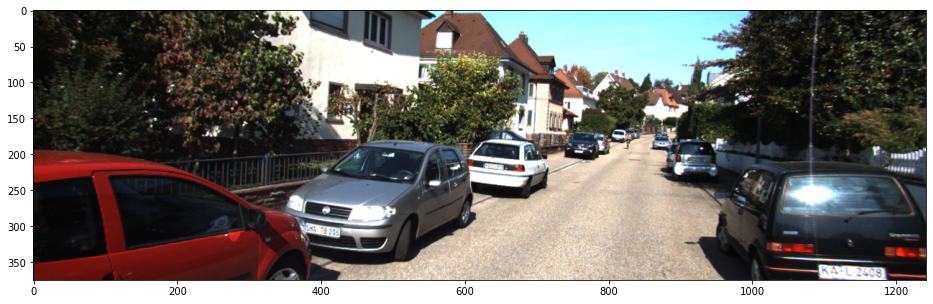

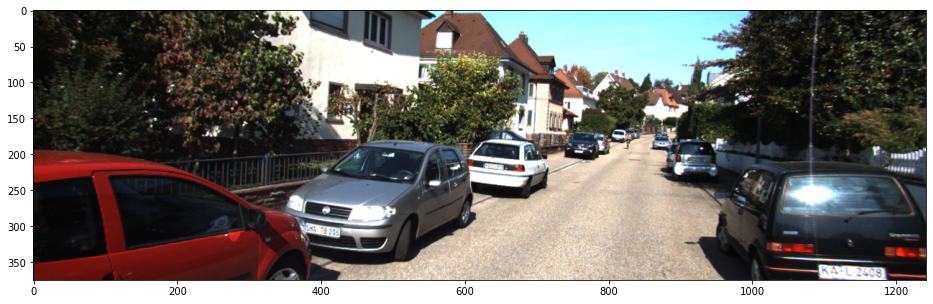

In [5]:
#load and view test images

left_image = cv2.imread("./test/images/l.png")
view.show_image_on_different_window(left_image)

right_image = cv2.imread("./test/images/r.png")
view.show_image_on_different_window(left_image)

In [6]:
rgb_image, scores, bbox_2d, obj_names, bbox_3d_corner_homo = detector.predict(left_image, right_image)

NameError: name 'detector' is not defined

In [ ]:
if len(scores) > 0:
#         rgb_image = draw_bbox2d_to_image(rgb_image, bbox_2d.cpu().numpy())
        for box in bbox_3d_corner_homo:
            box = box.cpu().numpy().T
            rgb_image = draw_3D_box(rgb_image, box)
fig = plt.figure(figsize=(16,9))
rgb_image = rgb_image[:,:,::-1]
plt.imshow(np.clip(rgb_image, 0, 255))

In [ ]:
start_track = time.time()

l=100
for i in range (l):
    left_image = cv2.imread("./data/image_2/%06d" % i+".png")
    right_image = cv2.imread("./data/image_3/%06d" % i+".png")
    
    rgb_image, scores, bbox_2d, obj_names, bbox_3d_corner_homo = detector.predict(left_image, right_image)
    
    fig = plt.figure(figsize=(16,9))
    for box in bbox_3d_corner_homo:
        box = box.cpu().numpy().T
        rgb_image = draw_3D_box(rgb_image, box)
    rgb_image=cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB)
    clear_output(wait=True) #to show in same window 
    plt.imshow(rgb_image)
    print(i)
    plt.show()
    
end_track = time.time()

# Time elapsed
seconds_track = end_track - start_track
print ("Time taken : {0} seconds".format(seconds_track))

# Calculate frames per second
fps_track  = l / seconds_track
print("Estimated frames per second : {0}".format(fps_track))

In [ ]:
imagei,track_bbs_ids=assignTrackID(left_image,right_image)
# print(track_bbs_ids)
for bbs in track_bbs_ids: #for each vehicle in a image frame
    bb=bbs[0] #current bounding box
    future_bb=bbs[1] #future bounding boxes
    vehicle_id=bbs[-1] #vehicle id
    print('bb coords',bb)
    print('trackID',bbs[-1])
    print('future coords',future_bb,'\n')

In [ ]:
start_track = time.time()
l=100

for i in range (l):
    left_image = cv2.imread("./data/image_2/%06d" % i+".png")
    right_image = cv2.imread("./data/image_3/%06d" % i+".png")
    
    imagei,track_bbs_ids=assignTrackID(left_image,right_image)
    print('-------------------- {} --------------------'.format(i))

    for bbs in track_bbs_ids: #for each vehicle in a image frame
        bb=bbs[0] #current bounding box
        future_bbs=bbs[1] #future bounding boxes
        vehicle_ID=bbs[-1] #vehicle id
#         print('bb coords',bb)
#         print('trackID',bbs[-1])
#         print('future coords',future_bb,'\n')
    
        x,y=get_zone_check_point(bb)
        if is_in_zone(x,y):
            print('Warning!','Frame:',frame,'vehicle ID:',i)
            
        for i,future_bb in enumerate (future_bbs):
            x,y=get_zone_check_point(future_bb)
            if is_in_zone(x,y):
                print('Warning!','Future Frame: ',i,'vehicle ID:',vehicle_ID)
                
end_track = time.time()

# Time elapsed
seconds_track = end_track - start_track
print ("Time taken : {0} seconds".format(seconds_track))

# Calculate frames per second
fps_track  = l / seconds_track
print("Estimated frames per second : {0}".format(fps_track))

In [ ]:
start_track = time.time()
l=837

for i in range (l):
    left_image = cv2.imread("./data/image_2/%06d" % i+".png")
    right_image = cv2.imread("./data/image_3/%06d" % i+".png")
    
    image,track_bbs_ids=assignTrackID(left_image,right_image)
#     print('-------------------- {} --------------------'.format(i))
    
    id_list=[]
    future_id_list=[]

    for bbs in track_bbs_ids: #for each vehicle in a image frame
        bb=bbs[0] #current bounding box
        future_bbs=bbs[1] #future bounding boxes
        vehicle_ID=bbs[-1] #vehicle id
#         print('bb coords',bb)
#         print('trackID',bbs[-1])
#         print('future coords',future_bb,'\n')
    
        x,y=get_zone_check_point(bb)
        if is_in_zone(x,y):
            print('Warning!','Frame:',i,'vehicle ID:',i)
            id_list.append(vehicle_ID)
            
        for i,future_bb in enumerate (future_bbs):
            x,y=get_zone_check_point(future_bb)
            if is_in_zone(x,y):
                print('Warning!','Future Frame: ',i,'vehicle ID:',vehicle_ID)
                future_id_list.append(vehicle_ID)
                
    rgb_image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    draw_danger_zone(rgb_image)
    if len(id_list)>0:
        show_zone_warning(rgb_image,id_list)
    if len(future_id_list)>0:
        show_future_warning(rgb_image,future_id_list)
        
    
    fig = plt.figure(figsize=(16,9))
    clear_output(wait=True) #to show in same window 
    plt.imshow(rgb_image)
    plt.show()
    
end_track = time.time()

# Time elapsed
seconds_track = end_track - start_track
print ("Time taken : {0} seconds".format(seconds_track))

# Calculate frames per second
fps_track  = l / seconds_track
print("Estimated frames per second : {0}".format(fps_track))

In [ ]:
## save image results
start_track = time.time()
l=837

for index in range (l):
    left_image = cv2.imread("./data/image_2/%06d" % index+".png")
    right_image = cv2.imread("./data/image_3/%06d" % index+".png")
    
    image,track_bbs_ids=assignTrackID(left_image,right_image)
    
    id_list=[]
    future_id_list=[]

    for bbs in track_bbs_ids: #for each vehicle in a image frame
        bb=bbs[0] #current bounding box
        future_bbs=bbs[1] #future bounding boxes
        vehicle_ID=bbs[-1] #vehicle id

    
        x,y=get_zone_check_point(bb)
        if is_in_zone(x,y):
            id_list.append(vehicle_ID)
            
        for j,future_bb in enumerate (future_bbs):
            x,y=get_zone_check_point(future_bb)
            if is_in_zone(x,y):
                future_id_list.append(vehicle_ID)
                
    draw_danger_zone(image)
    if len(id_list)>0:
        show_zone_warning(image,id_list)
    if len(future_id_list)>0:
        show_future_warning(image,future_id_list)
    
    out_path = "./data/trajectory/%06d" % index+".png"
    
    print(index,cv2.imwrite(out_path, image))
        
end_track = time.time()

# Time elapsed
seconds_track = end_track - start_track
print ("Time taken : {0} seconds".format(seconds_track))

# Calculate frames per second
fps_track  = l / seconds_track
print("Estimated frames per second : {0}".format(fps_track))
